## Analisis Cluster Untuk Pengelompokan Daerah yang terkena COVID-19 di setiap Kota/Kabupaten di Jawa Barat Per Tanggal 14 September 2022 Dengan Metode k-Medoids

Pengertian K-Medoids

Link 1 : https://medium.com/@tribinty/k-medoids-partitioning-around-medoids-pam-non-hierarchical-clustering-with-r-9d0af590bbc0

Link 2 : https://piptools.net/algoritma-k-medoids-clustering/

Link 3 : https://ojs.serambimekkah.ac.id/jnkti/article/view/4355/pdf

In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn_extra.cluster import KMedoids

In [ ]:
# Import Data
data = pd.read_excel('Data COVID JABAR.xlsx','Sheet3')
df = pd.read_excel('Data COVID JABAR.xlsx','Sheet3', usecols="B:C")
df.head()

,Terkonfirmasi,Meninggal
0,434,634
1,188,307
2,316,571
3,242,206
4,57,328


### Standard Scaling

Scaling termasuk dalam bagian preprocessing. Umumnya, orang menggunakan scikit-learn dalam pembuatan model machine learning. Di scikit-learn ada beberapa scaler yang umum dijumpai yaitu StandardScaler. StandardScaler adalah class dari sklearn untuk melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar.
Link : https://medium.com/codelabs-unikom/membangun-model-klasifikasi-untuk-memprediksi-pokemon-legend-935d2accceaa#:~:text=StandardScaler%20adalah%20class%20dari%20sklearn,tidak%20memiliki%20penyimpangan%20yang%20besar.&text=Satu%20hal%20penting%20dalam%20Data,apa%20yang%20akan%20di%20analisis.

In [ ]:
# Import Library StandarScaler
from sklearn.preprocessing import StandardScaler
# Proses Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
X_scaled

array([[ 4.29171074e-02,  1.22459110e-01],
       [-1.80862632e-01, -4.98036524e-01],
       [-6.44243936e-02,  2.91407954e-03],
       [-1.31740250e-01, -6.89688081e-01],
       [-3.00029891e-01, -4.58188181e-01],
       [-2.78197722e-01, -6.49839737e-01],
       [-3.27320103e-01,  7.54339985e-01],
       [-2.15430234e-01,  1.35965530e+00],
       [-3.10036302e-01,  3.71036872e-01],
       [-2.26346319e-01,  2.80178582e+00],
       [-3.07307281e-01, -5.30294707e-01],
       [-3.19133040e-01, -5.73938131e-01],
       [-3.30049125e-01, -7.84565089e-01],
       [-3.21862061e-01,  7.31230657e-02],
       [-2.23617297e-01, -5.13216845e-01],
       [-3.20042714e-01, -4.03159516e-01],
       [-3.11855650e-01, -7.39024125e-01],
       [-3.16404019e-01, -4.75266042e-01],
       [ 4.29528445e-01, -2.20995660e-01],
       [-3.30958798e-01, -8.05438031e-01],
       [ 2.56690435e-01,  9.28913680e-01],
       [ 1.37523176e-01, -3.31391836e-02],
       [-5.53276562e-02, -7.01073322e-01],
       [-2.

### Matode Elbow

Elbow method adalah metoda yang sering dipakai untuk menentukan jumlah cluster yang akan digunakan pada k-means clustering.

Seperti yang sudah dibahas sebelumnya, clustering adalah meminimumkan jarak antara data point dan centroid, serta memaksimumkan jarak antara centroid yang dihitung menggunakan within-cluster sum of squares atau WCSS.

Link : https://skillplus.web.id/elbow-method/

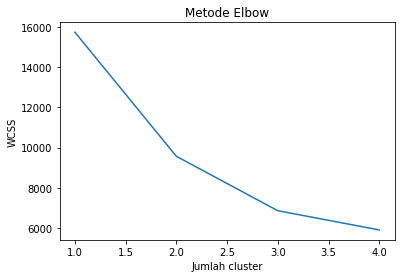

In [ ]:
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
wcss = []
for i in range(1, 5):
  kmedoids = KMedoids(n_clusters = i, init = 'k-medoids++', random_state=42)
  kmedoids.fit(df)
  wcss.append(kmedoids.inertia_)
plt.plot(range(1, 5), wcss)
plt.title("Metode Elbow")
plt.xlabel("Jumlah cluster")
plt.ylabel("WCSS")
plt.show()

### Proses Clustering dengan K-Medoids

In [ ]:
# Proses Clustering
kMedoids = KMedoids(n_clusters = 3, max_iter=300, metric='euclidean', random_state = 0)
kMedoids.fit(X_scaled)
y_kmed = kMedoids.fit_predict(X_scaled)

In [ ]:
# Hasil Clustering
data['Cluster'] = kMedoids.labels_
data

,Nama Kota/Kabupaten,Terkonfirmasi,Meninggal,Cluster
0,KAB. BANDUNG,434,634,2
1,KAB. BANDUNG BARAT,188,307,1
2,KAB. BEKASI,316,571,2
3,KAB. BOGOR,242,206,1
4,KAB. CIAMIS,57,328,1
5,KAB. CIANJUR,81,227,1
6,KAB. CIREBON,27,967,0
7,KAB. GARUT,150,1286,0
8,KAB. INDRAMAYU,46,765,2
9,KAB. KARAWANG,138,2046,0


In [ ]:
! pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data.to_excel("K-Medoids_cluster.xlsx")

### Hasil Clustering Dalam Bentuk Visualisasi

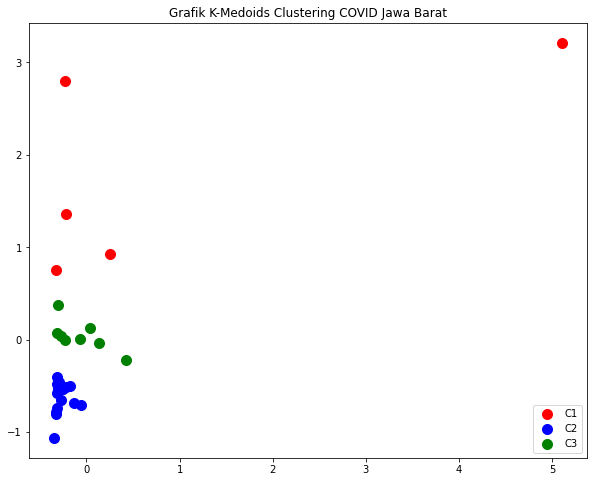

In [ ]:
plt.figure (figsize=(10, 8))
plt.scatter (X_scaled[y_kmed == 0, 0], X_scaled[y_kmed == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter (X_scaled[y_kmed == 1, 0], X_scaled[y_kmed == 1, 1], s = 100, c = 'blue', label = 'C2')
plt.scatter (X_scaled[y_kmed == 2, 0], X_scaled[y_kmed == 2, 1], s = 100, c = 'green', label = 'C3')
plt.savefig("plot_K-Medoids_clutsering.png")
plt.title("Grafik K-Medoids Clustering COVID Jawa Barat")
plt.legend(loc="lower right");

### Silhoutte Score

Skor Silhouette digunakan untuk mengevaluasi kualitas cluster yang dibuat menggunakan algoritma clustering seperti K-Means, K-Medoids, DBSCAN dll dalam hal seberapa baik sampel dikelompokkan dengan sampel lain yang mirip satu sama lain. Skor Silhouette dihitung untuk setiap sampel dari cluster yang berbeda. Untuk menghitung skor Silhouette untuk setiap pengamatan/titik data, perlu diketahui jarak berikut untuk setiap pengamatan yang termasuk dalam semua cluster.

Link 1 :https://signalfix.net/id/skor-silhouette-kmeans-dijelaskan-dengan-contoh-python

Link 2 : https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

In [ ]:
# Import Library Silhoutte Score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, y_kmed)
print(silhouette_avg)

0.459821430959625


In [ ]:
# Proses Visualisasi Silhouette Score
# sw (Silhouette Widht)
sw = []

for i in range(2, 11):
    kMedoids = KMedoids(n_clusters = i, random_state = 42)
    kMedoids.fit(X_scaled)
    y_kmed = kMedoids.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, y_kmed)
    sw.append(silhouette_avg)

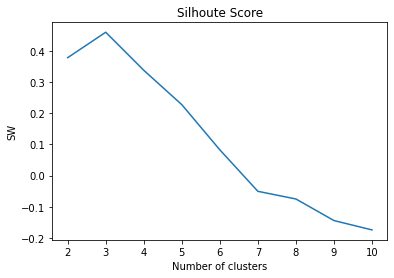

In [ ]:
# Visualisasi nilai Silhouette Score
plt.plot(range(2, 11), sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show();